C:\Users\Florian\AppData\Local\Temp\ipykernel_19524\3442386771.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  buffer_ = np.fromstring(h.read(), np.uint8)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


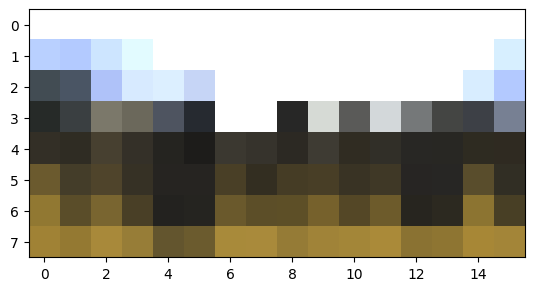

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


city tensor(27.5312, device='cuda:0')


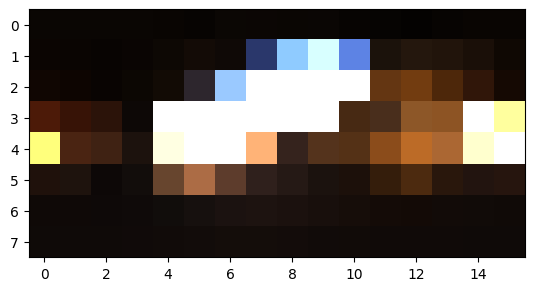

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


courtyard tensor(11.0938, device='cuda:0')


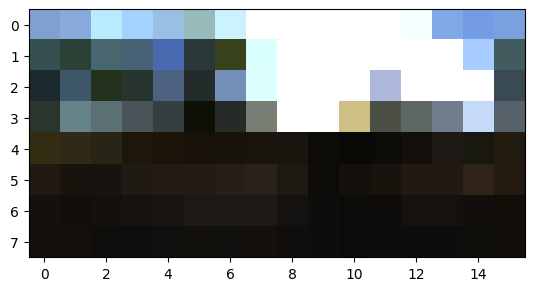

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


forest tensor(8.7852, device='cuda:0')


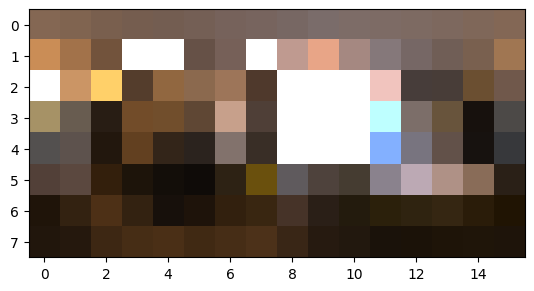

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


interior tensor(26.0146, device='cuda:0')


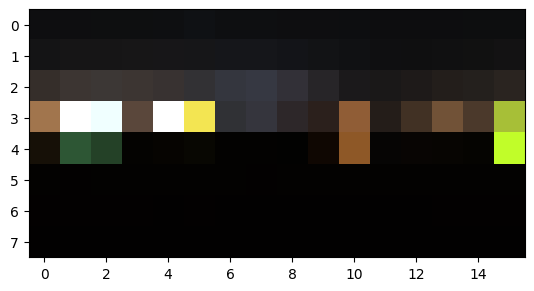

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


night tensor(5.2695, device='cuda:0')


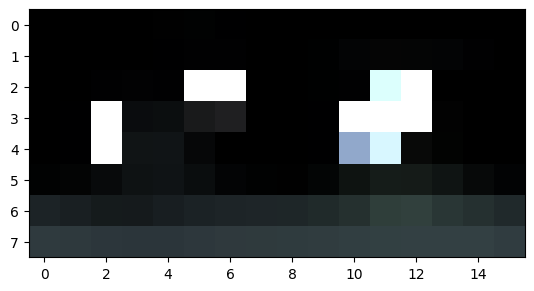

studio tensor(6.1572, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


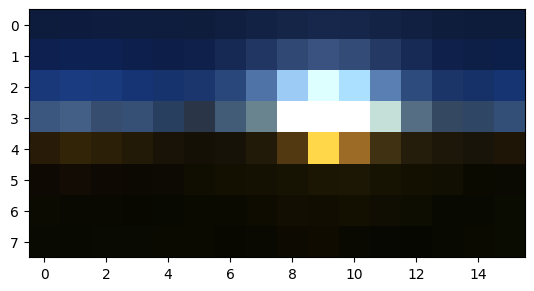

sunrise 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(40.5938, device='cuda:0')


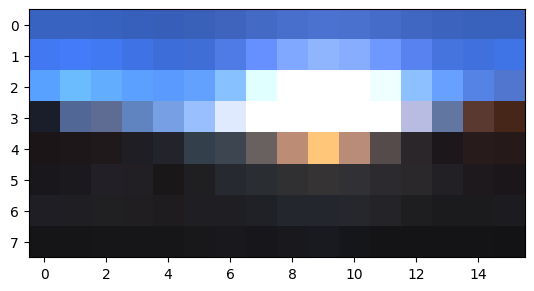

sunset tensor(6.5469, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


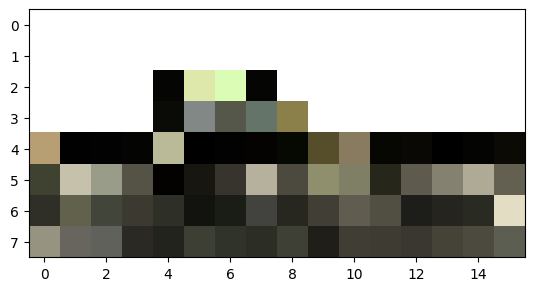

turing_probe tensor(6.6250, device='cuda:0')


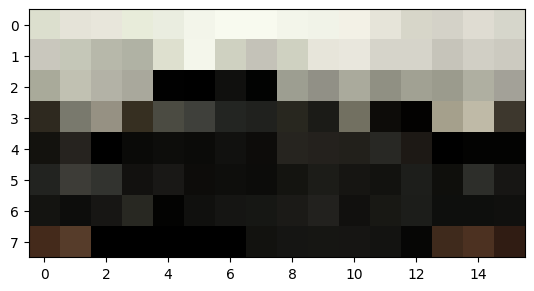

turing_probe_old tensor(0.9805, device='cuda:0')


In [1]:
import os
import cv2
from os.path import basename
import os.path as osp
import numpy as np
import torch
light_res = (8,16)
from collections import OrderedDict
import matplotlib.pyplot as plt

def read_hdr(path):
    """Reads an HDR map from disk.

    Args:
        path (str): Path to the .hdr file.

    Returns:
        numpy.ndarray: Loaded (float) HDR map with RGB channels in order.
    """
    import cv2
    with open(path, 'rb') as h:
        buffer_ = np.fromstring(h.read(), np.uint8)
    bgr = cv2.imdecode(buffer_, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

novel_probes = OrderedDict()
for path in sorted(os.listdir('light-probes/')):
    if '.hdr' in path:
        name = basename(path)[:-len('.hdr')]
        arr = read_hdr(osp.join('light-probes/', path))
        arr = cv2.resize(arr, (light_res[1], light_res[0]), interpolation=cv2.INTER_LINEAR)
        plt.imshow(arr)
        plt.show()
        tensor = torch.from_numpy(arr).cuda()
        novel_probes[name] = tensor
        print (name, tensor.max())

pos: Parameter containing:
tensor([3.8128, 3.8861], requires_grad=True)
intens: Parameter containing:
tensor([2.8826], requires_grad=True)
sigma: Parameter containing:
tensor([0.8469], requires_grad=True)
ambient: Parameter containing:
tensor([0.4615], requires_grad=True)
torch.Size([8, 16, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


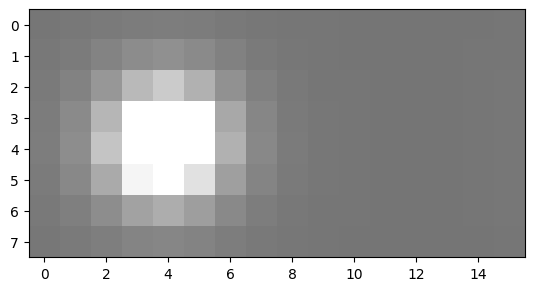

In [415]:

import torch

light_h = 8
light_res = (light_h, 2*light_h)
light_pos = torch.rand(2) * torch.Tensor(light_res).float()
light_intensity = torch.rand(1) * 3
light_sigma = torch.rand(1) * 0.5 + 0.5
light_ambient = torch.rand(1) * 0.5 

pos = torch.nn.Parameter(light_pos)
intens = torch.nn.Parameter(light_intensity)
sigma = torch.nn.Parameter(light_sigma)
ambient = torch.nn.Parameter(light_ambient)

def gen_light_grid(light_res):
    positions = torch.meshgrid(torch.arange(light_res[0]), torch.arange(light_res[1]))
    xs, ys = positions
    xs = xs.float()
    ys = ys.float()
    
    dy = torch.abs(ys - pos[1])
    dy = torch.min(dy, light_res[1] - dy)
    
    distance = torch.sqrt((xs - pos[0])**2 + dy**2)
    gaussian = torch.exp(-distance / sigma)
    light = intens * gaussian + ambient
    return light
    #light = light_intensity * gaussian + light_ambient
print(f"pos: {pos}")
print(f"intens: {intens}")
print(f"sigma: {sigma}")
print(f"ambient: {ambient}")
grid = gen_light_grid(light_res).unsqueeze(-1).repeat(1,1,3)
print (grid.shape)
plt.imshow(grid.cpu().detach().numpy())
plt.show()



C:\Users\Florian\AppData\Local\Temp\ipykernel_31612\396324732.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  buffer_ = np.fromstring(h.read(), np.uint8)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6.84375 0.0


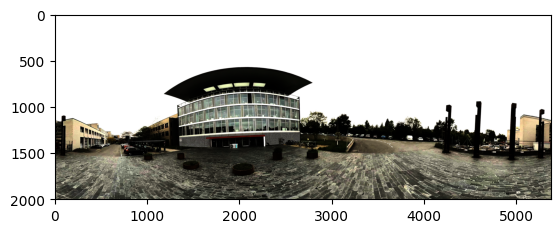

In [24]:
import os
import cv2
from os.path import basename
import os.path as osp
import numpy as np
import torch
light_res = (8,16)
from collections import OrderedDict
import matplotlib.pyplot as plt
import imageio.v2 as imageio

def read_hdr(path):
    """Reads an HDR map from disk.

    Args:
        path (str): Path to the .hdr file.

    Returns:
        numpy.ndarray: Loaded (float) HDR map with RGB channels in order.
    """
    with open(path, 'rb') as h:
        buffer_ = np.fromstring(h.read(), np.uint8)
    bgr = cv2.imdecode(buffer_, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

novel_probes = OrderedDict()
path = osp.join('light-probes/turing_probe.hdr')

with open(path, 'rb') as h:
    buffer_ = np.fromstring(h.read(), np.uint8)
bgr = cv2.imdecode(buffer_, cv2.IMREAD_UNCHANGED)
print(bgr.max(), bgr.min())
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

if "turing" in path:
    rgb = rgb[:-int(0.18*rgb.shape[0])]
#rgb = cv2.cvtColor(lab, cv2.COLOR_RGB2RGB)
#print(rgb.max(), rgb.min())
plt.imshow(rgb)
plt.show()


# in case we need to generate videos again from images

In [2]:
from easymocap.mytools.debug_utils import run_cmd
newest = 'neuralbody/soccer1_6_relight/demo_285'

for key in ['rgb_map', 'acc_map', 'feat_map', 'normal_map', 'depth_map', 'brdf_map']:
    cmd = f'ffmpeg -y -i {newest}/{key}_%06d.jpg -vcodec libx264 -pix_fmt yuv420p {newest}_{key}.mp4 -loglevel quiet'
    run_cmd(cmd)
for key in ['rgba_map']+['rgba_olat_{}'.format(i) for i in range(8)] + ['rgba_probes_{}'.format(i) for i in range(10)]: 
    cmd = f'ffmpeg -y -i {newest}/{key}_%06d.png -vcodec libx264 -pix_fmt yuv420p {newest}_{key}.mp4 -loglevel quiet'
    run_cmd(cmd)

[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/rgb_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/soccer1_6_relight/demo_285_rgb_map.mp4 -loglevel quiet
[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/acc_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/soccer1_6_relight/demo_285_acc_map.mp4 -loglevel quiet
[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/feat_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/soccer1_6_relight/demo_285_feat_map.mp4 -loglevel quiet
[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/normal_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/soccer1_6_relight/demo_285_normal_map.mp4 -loglevel quiet
[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/depth_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/soccer1_6_relight/demo_285_depth_map.mp4 -loglevel quiet
[run] ffmpeg -y -i neuralbody/soccer1_6_relight/demo_285/brdf_map_%06d.jpg -vcodec libx264 -pix_fmt yuv420p neuralbody/socc

In [153]:
import torch


z_vals = torch.arange(0, 2, 0.1).repeat(100,1)

alpha = (torch.rand(100, 20)-0.9).clip(0,1)
print(alpha)
acc_map = torch.cumsum(alpha, dim=-1)
weights = alpha * torch.cumprod(
        torch.cat(
            [torch.ones((alpha.shape[0], 1)).to(alpha), 1. - alpha + 1e-10],
            -1), -1)[:, :-1]
acc_map = torch.sum(weights, -1)

threshold = 0.5
msk = torch.gt(alpha, threshold)

print(f"z_vals.shape: {z_vals.shape}")
print(f"msk.shape: {msk.shape}")
#first value of z_vals above the threshold
indices = torch.argmax(msk.to(torch.long), dim=-1) # argmax gives the first True value
print (indices)
print(f"indices.shape: {indices.shape}")
print(f"z_vals.shape: {z_vals.shape}")
print(indices)
depth_map = z_vals.gather(-1, indices.unsqueeze(-1)).squeeze(-1)
print (depth_map)
print(f"depth_map.shape: {depth_map.shape}")
print(f"acc_map.shape: {acc_map.shape}")
print(f"acc_map: {acc_map}")

depth_map = depth_map/ (1e-10 + acc_map)
print(depth_map)

tensor([[0.0000, 0.0527, 0.0000,  ..., 0.0000, 0.0000, 0.0679],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0802, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0273, 0.0000],
        [0.0000, 0.0000, 0.0594,  ..., 0.0000, 0.0000, 0.0000]])
z_vals.shape: torch.Size([100, 20])
msk.shape: torch.Size([100, 20])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
indices.shape: torch.Size([100])
z_vals.shape: torch.Size([100, 20])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,